# Random Forest

In [1]:
# Import the Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

C:\Users\Sony\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
# Load the dataset

In [3]:
dataset = pd.read_csv("C:/Users/Sony/Desktop/Data-Science-Training/4. Regression/Regression-PPT/Salary_Data.csv")

In [4]:
dataset.head()

YearsExperience   Salary
0              1.1  39343.0
1              1.3  46205.0
2              1.5  37731.0
3              2.0  43525.0
4              2.2  39891.0

In [5]:
# Seperate Independent Variable and Dependent Variable from data

In [6]:
# Independent
X = dataset.iloc[ : , 0:1]

In [7]:
X.head()

YearsExperience
0              1.1
1              1.3
2              1.5
3              2.0
4              2.2

In [8]:
# Dependent Variable / Target
y = dataset.iloc[ : , 1:2]

In [9]:
y.head()

Salary
0  39343.0
1  46205.0
2  37731.0
3  43525.0
4  39891.0

In [10]:
# Feature Scaling
# if more than 1 columns in X

In [11]:
# Divide our data into Training Set (80%) and Test Set (20%)

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.2, random_state = 0 )

In [15]:
X_train.shape, X_test.shape

((24, 1), (6, 1))

In [16]:
X_test

YearsExperience
2               1.5
28             10.3
13              4.1
10              3.9
26              9.5
24              8.7

In [21]:
# Build Random Forest

In [22]:
from sklearn.ensemble import RandomForestRegressor

In [25]:
forestRegressor = RandomForestRegressor(n_estimators=10) 

In [26]:
### Train my model
#### X_train.values, y_train.values

In [29]:
forestRegressor.fit(X_train, y_train)

C:\Users\Sony\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [32]:
forestRegressor.score(X_train, y_train) * 100

98.86544772105539

In [33]:
# Predict or test

In [34]:
y_pred = forestRegressor.predict(X_test)

In [35]:
y_pred

array([ 45250.8, 120024.6,  56837.3,  56837.3, 112366.5, 107623. ])

In [37]:
y_test

Salary
2    37731.0
28  122391.0
13   57081.0
10   63218.0
26  116969.0
24  109431.0

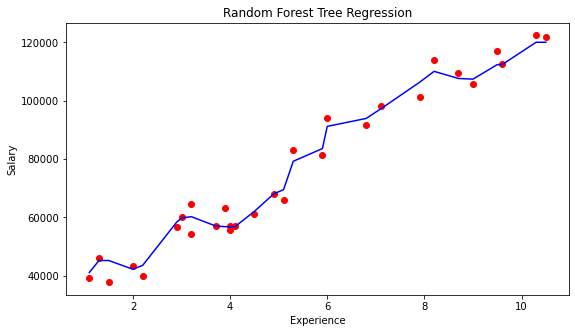

In [41]:
#### Visualize my tree
plt.figure(figsize=(9,5))
X_1 = X.values
X_grid = np.arange(min(X_1), max(X_1), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X_1, y, color = 'red')
# plt.plot(X_grid, regressorDT.predict(X_grid), color = 'blue')
plt.plot(X, forestRegressor.predict(X), color = 'blue') # Line graph
plt.title('Random Forest Tree Regression')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.show()

In [45]:
forestRegressor.oob_score

False

In [46]:
# Create new Random Forest with OOB score as True

In [47]:
forestRegressor2 = RandomForestRegressor(n_estimators=10, oob_score=True) 

In [48]:
forestRegressor2.fit(X_train, y_train)

C:\Users\Sony\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.
C:\Users\Sony\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=True,
                      random_state=None, verbose=0, warm_start=False)

In [49]:
forestRegressor2.score(X_train, y_train)

0.9835857007958799

In [50]:
forestRegressor2.feature_importances_

array([1.])